In [1]:
'''>>>>> start CodeP4.1F21
    V.P. Carey ME249, Fall 2021

Intro to Neural Network Modeling 
Keras model for PV power system'''

#import useful packages
import math
import keras
import pandas as pd
from keras.models import Sequential
import numpy as np
import keras.backend as kb
import tensorflow as tf
#the follwoing 2 lines are only needed for Mac OS machines
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# define meadian values of input variables - add your values here
Dmed = 1  #make sure Tamed does not = 0
Qmed = 1
Xmed = 1
Tmed = 1

#create input data array
xdata = []


#Part 1 input data: Air temp (degC), ID (W/sqm), load resistance (ohms)
#xdata = [[-10.0, 350, 4.464]] 
#xdata.append([-10.0, 650, 4.464]) 
#xdata.append([-10.0, 950, 4.464]) 
#xdata.append([-10.0, 1250, 4.464])
xdata.append([0.008, 550, 0.525, 306.7])
xdata.append([0.008, 650, 0.525, 298.5])
xdata.append([0.008, 750, 0.525, 294.5])
xdata.append([0.008, 850, 0.525, 290.2])
xdata.append([0.008, 950, 0.524, 286.9])
xdata.append([0.008, 1050, 0.524, 284.1])
xdata.append([0.008, 1150, 0.525, 281.7])
xdata.append([0.008, 850, 0.524, 290.31])
xdata.append([0.008, 550, 0.734, 307.9])
xdata.append([0.008, 750, 0.735, 295.5])
xdata.append([0.008, 950, 0.735, 287.8])
xdata.append([0.008, 1050, 0.735, 285.0])
xdata.append([0.008, 1150, 0.735, 282.5])
xdata.append([0.008, 850, 0.734, 291.3])
xdata.append([0.008, 550,  0.945, 308.6])
xdata.append([0.008, 750, 0.945, 296.2])
xdata.append([0.008, 950, 0.945, 288.5])
xdata.append([0.008, 1150, 0.945, 283.1])
xdata.append([0.008, 850, 0.945, 291.9])
xdata.append([0.011, 550,  0.525, 328.0])
xdata.append([0.011, 750, 0.525, 311.2])
xdata.append([0.011, 950, 0.525, 300.8])
xdata.append([0.011, 1150, 0.525, 293.6])
xdata.append([0.011, 850, 0.525, 305.5])
xdata.append([0.011, 550, 0.735, 329.6])
xdata.append([0.011, 750, 0.735, 312.6])
xdata.append([0.011, 950, 0.735, 302.0])
xdata.append([0.011, 1050, 0.735, 299.4])
xdata.append([0.011, 1150, 0.735, 294.8])
xdata.append([0.011, 850, 0.735, 306.8])
xdata.append([0.011, 550,  0.945, 330.7])
xdata.append([0.011, 750, 0.945, 313.6])
xdata.append([0.011, 950, 0.944, 302.9])
xdata.append([0.011, 1150, 0.945, 295.6])
xdata.append([0.011, 850, 0.944, 307.7])
xdata.append([0.011, 700, 0.734, 324.7])
xdata.append([0.013, 550, 0.525, 342.2])
xdata.append([0.013, 750, 0.524,  322.3])
xdata.append([0.013, 950, 0.524, 310.0])
xdata.append([0.013, 1150, 0.525, 301.6])
xdata.append([0.013, 850, 0.524, 315.5])
xdata.append([0.013, 550, 0.734, 344.1])
xdata.append([0.013, 750, 0.735, 324.0])
xdata.append([0.013, 950, 0.735, 311.5])
xdata.append([0.013, 1050, 0.735, 306.3])
xdata.append([0.013, 1150, 0.735, 302.9])
xdata.append([0.013, 850, 0.734, 317.1])
xdata.append([0.013, 550, 0.945, 345.3])
xdata.append([0.013, 750, 0.944, 325.1])
xdata.append([0.013, 950, 0.944, 312.5])
xdata.append([0.013, 1150, 0.945, 303.9])
xdata.append([0.013, 850, 0.945, 318.2])


''' ADD THE REST OF THE INPUT DATA AND CONVERT TO:
xdata = [[-10.0/Tamed, 350/IDmed, 4.464/RLmed]] 
xdata.append([-10.0/Tamed, 650/IDmed, 4.464/RLmed]) 
xdata.append([-10.0/Tamed, 950/IDmed, 4.464/RLmed]) 
xdata.append([-10.0/Tamed, 1250/IDmed, 4.464/RLmed]) 
... etc.'''



# define meadian values of input variables - add your values here
Mmed = 1


#create input data array
ydata = []

#Part 1 output data: VL (V) and Power out Wd (W)
ydata.append([0.06157])
ydata.append([0.07269])
ydata.append([0.08396])
ydata.append([0.09347])
ydata.append([0.10635])
ydata.append([0.11521])
ydata.append([0.1287])
ydata.append([0.09516])
ydata.append([0.04398])
ydata.append([0.05997])
ydata.append([0.07596])
ydata.append([0.08343])
ydata.append([0.0919])
ydata.append([0.06797])
ydata.append([0.0342])
ydata.append([0.04664])
ydata.append([0.05908])
ydata.append([0.0715])
ydata.append([0.05286])
ydata.append([0.0846])
ydata.append([0.1154])
ydata.append([0.1462])
ydata.append([0.177])
ydata.append([0.1308])
ydata.append([0.06047])
ydata.append([0.08246])
ydata.append([0.1044])
ydata.append([0.1134])
ydata.append([0.1264])
ydata.append([0.0934])
ydata.append([0.047])
ydata.append([0.06413])
ydata.append([0.08124])
ydata.append([0.09834])
ydata.append([0.072691])
ydata.append([0.087196])
ydata.append([0.10005])
ydata.append([0.13644])
ydata.append([0.17282])
ydata.append([0.2092])
ydata.append([0.15463])
ydata.append([0.07147])
ydata.append([0.09745])
ydata.append([0.12344])
ydata.append([0.13302])
ydata.append([0.1494])
ydata.append([0.11045])
ydata.append([0.05558])
ydata.append([0.0758])
ydata.append([0.09601])
ydata.append([0.1162])
ydata.append([0.0859])
''' ADD THE REST OF THE OUPUT DATA AND CONVERT TO:
ydata = [[18.9/VLmed, 80.3/Wdmed]] 
ydata.append([23.5/VLmed, 124.6/Wdmed]) 
ydata.append([24.8/VLmed, 138.6/Wdmed]) 
ydata.append([25.6/VLmed, 146.9/Wdmed]) 
... etc.'''

xarray= np.array(xdata)
yarray= np.array(ydata)
Dmed= np.median(xarray[:,0])
Qmed= np.median(xarray[:,1])
Xmed= np.median(xarray[:,2])
Tmed= np.median(xarray[:,3])
Mmed= np.median(yarray[:,0])



Xmedian = [Dmed,Qmed,Xmed,Tmed]   # determine median value, divide
Ymedian = [Mmed]
X_nor=xarray/Xmedian
Y_nor=yarray/Ymedian
print(Dmed)
print(Qmed)
print(Mmed)
print(Xmed)
print(Tmed)
print(X_nor)
print(Y_nor)

Using TensorFlow backend.


0.011
850.0
0.09265
0.735
304.7
[[0.72727273 0.64705882 0.71428571 1.00656383]
 [0.72727273 0.76470588 0.71428571 0.97965212]
 [0.72727273 0.88235294 0.71428571 0.96652445]
 [0.72727273 1.         0.71428571 0.95241221]
 [0.72727273 1.11764706 0.71292517 0.94158188]
 [0.72727273 1.23529412 0.71292517 0.93239252]
 [0.72727273 1.35294118 0.71428571 0.92451592]
 [0.72727273 1.         0.71292517 0.95277322]
 [0.72727273 0.64705882 0.99863946 1.01050213]
 [0.72727273 0.88235294 1.         0.96980637]
 [0.72727273 1.11764706 1.         0.94453561]
 [0.72727273 1.23529412 1.         0.93534624]
 [0.72727273 1.35294118 1.         0.92714145]
 [0.72727273 1.         0.99863946 0.95602232]
 [0.72727273 0.64705882 1.28571429 1.01279947]
 [0.72727273 0.88235294 1.28571429 0.97210371]
 [0.72727273 1.11764706 1.28571429 0.94683295]
 [0.72727273 1.35294118 1.28571429 0.9291106 ]
 [0.72727273 1.         1.28571429 0.95799147]
 [1.         0.64705882 0.71428571 1.07646866]
 [1.         0.88235294 0.71

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_nor, Y_nor, test_size=1/4)

In [3]:
# define neural network model

#As seen below, we have created four dense layers. 
#A dense layer is a layer in neural network that’s fully connected. 
#In other words, all the neurons in one layer are connected to all other neurons in the next layer.
#In the first layer, we need to provide the input shape, which is 1 in our case. 
#The activation function we have chosen is elu, which stands for exponential linear unit. .

from keras import backend as K
#initialize weights with values between -0.2 and 0.5
initializer = keras.initializers.RandomUniform(minval= -0.2, maxval=0.5)

model = keras.Sequential([
    keras.layers.Dense(6, activation=K.elu, input_shape=[4],  kernel_initializer=initializer),
    keras.layers.Dense(8, activation=K.elu,  kernel_initializer=initializer),
    keras.layers.Dense(16, activation=K.elu, kernel_initializer=initializer),
    keras.layers.Dense(8, activation=K.elu, kernel_initializer=initializer),
    keras.layers.Dense(1,  kernel_initializer=initializer)
  ])


2021-12-06 16:02:59.395873: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-06 16:02:59.396534: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 4. Tune using inter_op_parallelism_threads for best performance.


In [4]:
#We’re using RMSprop as our optimizer here. RMSprop stands for Root Mean Square Propagation. 
#It’s one of the most popular gradient descent optimization algorithms for deep learning networks. 
#RMSprop is an optimizer that’s reliable and fast.
#We’re compiling the mode using the model.compile function. The loss function used here 
#is mean squared error. After the compilation of the model, we’ll use the fit method with ~500 epochs.
#Number of epochs can be varied.

#from tf.keras import optimizers
rms = keras.optimizers.RMSprop(0.00020)
model.compile(loss='mean_absolute_error',optimizer=rms)


In [11]:
#After the compilation of the model, we’ll use the fit method with 500 epochs.
#I started with epochs value of 100 and then tested the model after training. 
#The prediction was not that good. Then I modified the number of epochs to 200 and tested the model again. 
#Accuracy had improved slightly, but figured I’d give it one more try. Finally, at 500 epochs 
#I found acceptable prediction accuracy.

#The fit method takes three parameters; namely, x, y, and number of epochs. 
#During model training, if all the batches of data are seen by the model once, 
#we say that one epoch has been completed.

# Add an early stopping callback
es = keras.callbacks.EarlyStopping(
    monitor='loss', 
    mode='min', 
    patience = 80, 
    restore_best_weights = True, 
    verbose=1)
# Add a checkpoint where loss is minimum, and save that model
mc = keras.callbacks.ModelCheckpoint('best_model.SB', monitor='loss', 
                     mode='min',  verbose=1, save_best_only=True)

historyData = model.fit(X_train,Y_train,epochs=500,callbacks=[es])

loss_hist = historyData.history['loss']
#The above line will return a dictionary, access it's info like this:
best_epoch = np.argmin(historyData.history['loss']) + 1
print ('best epoch = ', best_epoch)
print('smallest loss =', np.min(loss_hist))

model.save('./best_model')

Epoch 1/500
39/39 [==============================] - 0s 361us/step - loss: 0.2671
Epoch 2/500
39/39 [==============================] - 0s 269us/step - loss: 0.2668
Epoch 3/500
39/39 [==============================] - 0s 280us/step - loss: 0.2670
Epoch 4/500
39/39 [==============================] - 0s 326us/step - loss: 0.2692
Epoch 5/500
39/39 [==============================] - 0s 606us/step - loss: 0.2716
Epoch 6/500
39/39 [==============================] - 0s 875us/step - loss: 0.2710
Epoch 7/500
39/39 [==============================] - 0s 738us/step - loss: 0.2676
Epoch 8/500
39/39 [==============================] - 0s 467us/step - loss: 0.2668
Epoch 9/500
39/39 [==============================] - 0s 674us/step - loss: 0.2673
Epoch 10/500
39/39 [==============================] - 0s 542us/step - loss: 0.2671
Epoch 11/500
39/39 [==============================] - 0s 663us/step - loss: 0.2675
Epoch 12/500
39/39 [==============================] - 0s 435us/step - loss: 0.2681
Epoch 13/500


39/39 [==============================] - 0s 308us/step - loss: 0.2674
Epoch 197/500
39/39 [==============================] - 0s 378us/step - loss: 0.2687
Epoch 198/500
39/39 [==============================] - 0s 488us/step - loss: 0.2694
Epoch 199/500
39/39 [==============================] - 0s 435us/step - loss: 0.2680
Epoch 200/500
39/39 [==============================] - 0s 432us/step - loss: 0.2677
Epoch 201/500
39/39 [==============================] - 0s 431us/step - loss: 0.2679
Epoch 202/500
39/39 [==============================] - 0s 346us/step - loss: 0.2671
Epoch 203/500
39/39 [==============================] - 0s 347us/step - loss: 0.2682
Epoch 204/500
39/39 [==============================] - 0s 349us/step - loss: 0.2678
Epoch 205/500
39/39 [==============================] - 0s 455us/step - loss: 0.2667
Epoch 206/500
39/39 [==============================] - 0s 418us/step - loss: 0.2669
Epoch 207/500
39/39 [==============================] - 0s 450us/step - loss: 0.2671
Epoch 

In [48]:
test = []
outpt=[]

for i in range(len(X_train)):
    
    test = [[ X_train[i][0] , X_train[i][1] , X_train[i][2],X_train[i][3]]]
    testarray = np.array(test)
    outpt = model.predict(testarray)
    print ('row [0] data: inside_diameter= ', X_train[i][0]*Dmed, ', solar_flux= ', X_train[i][1]*Qmed, \
        ', exit_quality= ', X_train[i][2]*Xmed,', Max_t= ', X_train[i][3]*Tmed,\
        ', Mass_flow_rate= ', Y_train[i][0]*Mmed,',  data value Mass_flow rate = ', outpt[0][0]*Mmed)

row [0] data: inside_diameter=  0.008 , solar_flux=  550.0 , exit_quality=  0.734 , Max_t=  307.9 , Mass_flow_rate=  0.04398 ,  data value Mass_flow rate =  0.04111763394922018
row [0] data: inside_diameter=  0.011 , solar_flux=  850.0 , exit_quality=  0.735 , Max_t=  306.8 , Mass_flow_rate=  0.0934 ,  data value Mass_flow rate =  0.09512835144996643
row [0] data: inside_diameter=  0.008 , solar_flux=  550.0 , exit_quality=  0.525 , Max_t=  306.7 , Mass_flow_rate=  0.06157000000000001 ,  data value Mass_flow rate =  0.05798861063122749
row [0] data: inside_diameter=  0.008 , solar_flux=  1150.0 , exit_quality=  0.9449999999999998 , Max_t=  283.1 , Mass_flow_rate=  0.0715 ,  data value Mass_flow rate =  0.09046708431839942
row [0] data: inside_diameter=  0.011 , solar_flux=  550.0 , exit_quality=  0.9449999999999998 , Max_t=  330.7 , Mass_flow_rate=  0.047 ,  data value Mass_flow rate =  0.04283425172418356
row [0] data: inside_diameter=  0.011 , solar_flux=  750.0 , exit_quality=  0.73

In [49]:
pred_Mass_flow_rate=[]
data_value_Mass_flow_rate=[]
test=[]
for i in range(len(X_train)):

    test = [[ X_train[i][0] , X_train[i][1] , X_train[i][2],X_train[i][3]]]
    testarray = np.array(test)
    outpt = model.predict(testarray)
    pred_Mass_flow_rate.append(Y_train[i][0]*Mmed)
    data_value_Mass_flow_rate.append(outpt[0][0]*Mmed)

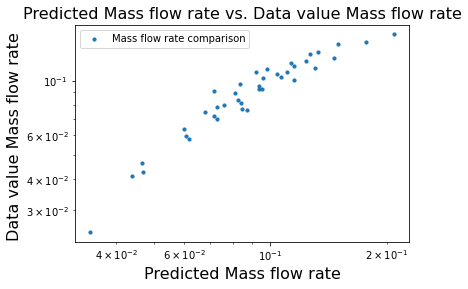

In [50]:
import matplotlib.pyplot as plt
plt.scatter(pred_Mass_flow_rate,data_value_Mass_flow_rate,s=10, label='Mass flow rate comparison')
plt.ylabel(r'Data value Mass flow rate ',fontsize = 16)
plt.xlabel(r'Predicted Mass flow rate',fontsize = 16)
plt.title('Predicted Mass flow rate vs. Data value Mass flow rate',fontsize=16)
plt.legend(loc='upper left')
plt.loglog()
plt.show()

In [47]:
test1 = []
outpt1=[]

for i in range(len(X_test)):
    
    test1 = [[ X_train[i][0] , X_train[i][1] , X_train[i][2],X_train[i][3]]]
    testarray1 = np.array(test1)
    outpt1 = model.predict(testarray1)
    print ('row [0] data: inside_diameter= ', X_train[i][0]*Dmed, ', solar_flux= ', X_train[i][1]*Qmed, \
        ', exit_quality= ', X_train[i][2]*Xmed,', Max_t= ', X_train[i][3]*Tmed,\
        ', Mass_flow_rate= ', Y_train[i][0]*Mmed,',  Normalized Mass_flow_rate = ', Y_test[i][0]*Mmed)

row [0] data: inside_diameter=  0.008 , solar_flux=  550.0 , exit_quality=  0.734 , Max_t=  307.9 , Mass_flow_rate=  0.04398 ,  Normalized Mass_flow_rate =  0.13644
row [0] data: inside_diameter=  0.011 , solar_flux=  850.0 , exit_quality=  0.735 , Max_t=  306.8 , Mass_flow_rate=  0.0934 ,  Normalized Mass_flow_rate =  0.05558
row [0] data: inside_diameter=  0.008 , solar_flux=  550.0 , exit_quality=  0.525 , Max_t=  306.7 , Mass_flow_rate=  0.06157000000000001 ,  Normalized Mass_flow_rate =  0.05908
row [0] data: inside_diameter=  0.008 , solar_flux=  1150.0 , exit_quality=  0.9449999999999998 , Max_t=  283.1 , Mass_flow_rate=  0.0715 ,  Normalized Mass_flow_rate =  0.09745
row [0] data: inside_diameter=  0.011 , solar_flux=  550.0 , exit_quality=  0.9449999999999998 , Max_t=  330.7 , Mass_flow_rate=  0.047 ,  Normalized Mass_flow_rate =  0.15463
row [0] data: inside_diameter=  0.011 , solar_flux=  750.0 , exit_quality=  0.735 , Max_t=  312.6 , Mass_flow_rate=  0.08246 ,  Normalized M

In [51]:
predict_Mass_flow_rate=[]
normalized_Mass_flow_rate=[]
test_Mass_flow_rate=[]
test_=[]
for i in range(len(X_test)):
    test_ = [[ X_test[i][0] , X_test[i][1] , X_test[i][2],X_test[i][3]]]
    testarray_ = np.array(test_)
    test_Mass_flow_rate = model.predict(testarray_)
    predict_Mass_flow_rate.append(Y_test[i][0]*Mmed)
    normalized_Mass_flow_rate.append(test_Mass_flow_rate[0][0]*Mmed)

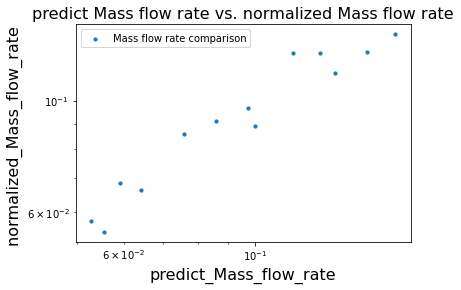

In [52]:
import matplotlib.pyplot as plt
plt.scatter(predict_Mass_flow_rate,normalized_Mass_flow_rate,s=10, label='Mass flow rate comparison')
plt.ylabel(r'normalized_Mass_flow_rate ',fontsize = 16)
plt.xlabel(r'predict_Mass_flow_rate',fontsize = 16)
plt.title('predict Mass flow rate vs. normalized Mass flow rate',fontsize=16)
plt.legend(loc='upper left')
plt.loglog()
plt.show()

In [6]:


# This line of code can be used to reconstruct the saved model.

recon_model = keras.models.load_model("best_model")

# the name of the model is now "recon_model". You can then use this model to do predictions for comparisons.
# See the previous project for code to do the comparisons.








AttributeError: 'str' object has no attribute 'decode'